In [1]:
import cv2 as cv

import numpy as np
import matplotlib.pyplot as plt

# [Drawing Functions in OpenCV](https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)

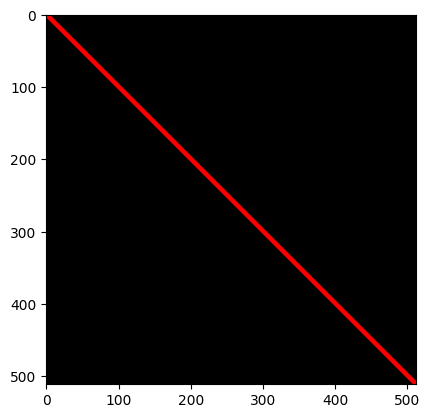

In [ ]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)
 
# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)
plt.imshow(img)
plt.show()

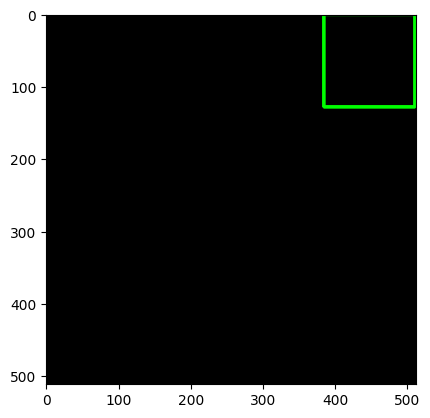

In [8]:
img = np.zeros((512,512,3), np.uint8)
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
plt.imshow(img)
plt.show()

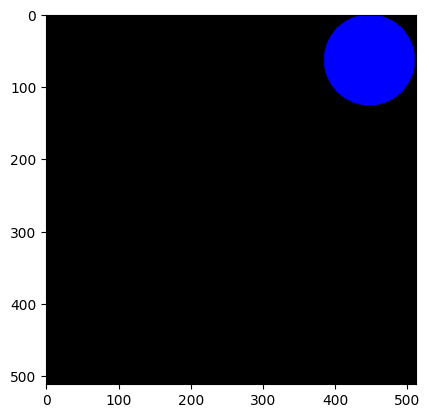

In [9]:
img = np.zeros((512,512,3), np.uint8)
cv.circle(img,(447,63), 63, (0,0,255), -1)
plt.imshow(img)
plt.show()

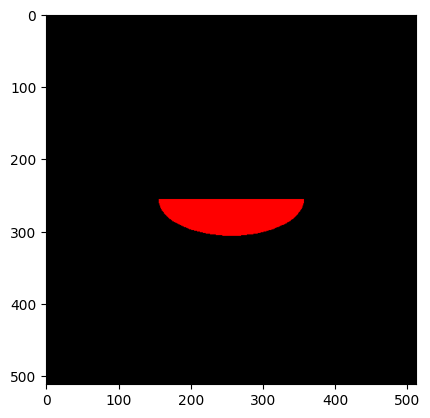

In [10]:
img = np.zeros((512,512,3), np.uint8)
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
plt.imshow(img)
plt.show()

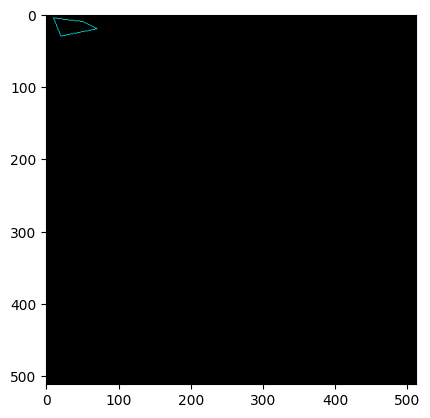

In [11]:
img = np.zeros((512,512,3), np.uint8)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))
plt.imshow(img)
plt.show()

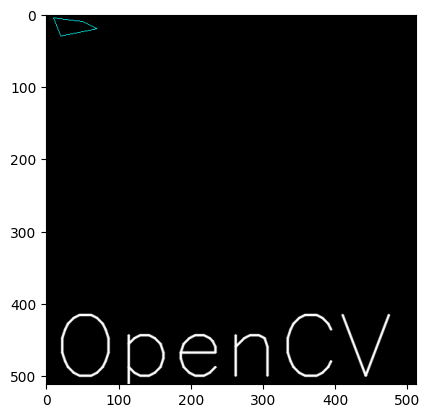

In [12]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)
plt.imshow(img)
plt.show()

# [Performance Measurement and Improvement Techniques](https://docs.opencv.org/3.4/dc/d71/tutorial_py_optimization.html)

In [14]:
e1 = cv.getTickCount()
# your code execution
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
time

4.4e-05

In [18]:
img1 = cv.imread('../img/messi.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
e1 = cv.getTickCount()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
e2 = cv.getTickCount()
t = (e2 - e1)/cv.getTickFrequency()
t

1.7513868

In [22]:
print(cv.useOptimized())
%timeit res = cv.medianBlur(img,49)

True
15.1 ms ± 2.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
cv.setUseOptimized(False)
print(cv.useOptimized())
%timeit res = cv.medianBlur(img,49)

False
23.3 ms ± 8.06 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
x = 5
%timeit y=x**2
%timeit y=x*x

272 ns ± 24.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
49.5 ns ± 4.95 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [35]:
z = np.uint8([5])
%timeit y=z*z
%timeit y=np.square(z)

684 ns ± 68.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
703 ns ± 74.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [ ]:
img = cv.imread('../img/messi.png', cv.IMREAD_GRAYSCALE)
%timeit z = cv.countNonZero(img)
%timeit z = np.count_nonzero(img)

13.4 µs ± 949 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
19.9 µs ± 4.28 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# [Getting Started with Videos](https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html)

In [42]:
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
 
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

In [45]:
import time
cap = cv.VideoCapture('output.avi')
 
while cap.isOpened():
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 
    cv.imshow('frame', gray)
    time.sleep(0.01666)
    if cv.waitKey(1) == ord('q'):
        break
 
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


In [44]:
cap = cv.VideoCapture(0)
 
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
 
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
 
    # write the flipped frame
    out.write(frame)
 
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
 
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()